# Exploratory Analysis

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Emir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Emir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## SQuAD 2.0 Dataset

### Load data

In [2]:
# Import the JSON file
df_squad = pd.read_json('../data/cleaned/squad/squad_train-v2.0_with_topics.json', orient='records', lines=True)

In [3]:
df_squad.head()

,context,question,is_impossible,answers,answer_in_context,question_length,context_length,num_answers,topic_hdp,category_hdp,topic_lda,category_lda,question_class
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,False,[in the late 1990s],True,6,109,1,1,1,1,2,NUM
1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,False,[singing and dancing],True,11,109,1,1,1,1,2,NUM
2,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,False,[2003],True,11,109,1,1,1,1,2,NUM
3,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,False,"[Houston, Texas]",True,9,109,1,1,1,1,2,LOC
4,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,False,[late 1990s],True,7,109,1,1,1,1,2,ENTY


### Analysis

This will help to see if any topics are overrepresented or underrepresented, which is crucial for stratified sampling. The education topics below were identified in the pre-processing stage:

**Education Topics**

* Topic #0: ['church', 'religious', 'political', 'culture', 'portugal', 'military', 'god', 'portuguese', 'roman', 'religion']
* Topic #1: ['specie', 'example', 'human', 'often', 'red', 'bird', 'animal', 'color', 'different', 'made']
* Topic #2: ['eisenhower', 'service', 'public', 'study', 'development', 'international', 'program', 'police', 'president', 'student']
* Topic #3: ['richmond', 'hunting', 'building', 'montana', 'house', 'island', 'north', 'largest', 'home', 'art']

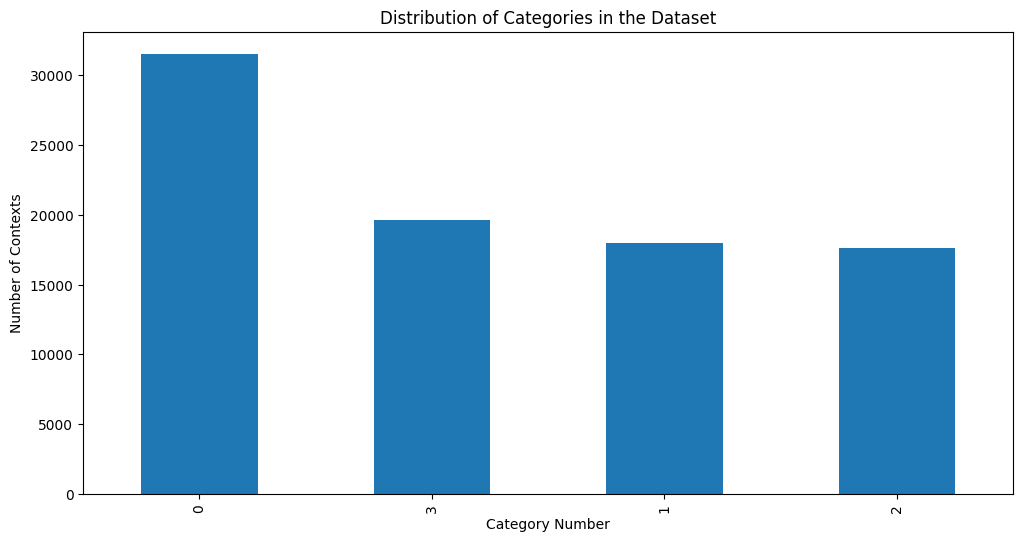

Count for categories:  topic_lda
0    31540
3    19599
1    18007
2    17635
Name: count, dtype: int64
Percentage for categories:  topic_lda
0    0.363444
3    0.225844
1    0.207499
2    0.203213
Name: count, dtype: float64


In [4]:
# Topic distribution

# Count the number of contexts per topic
topic_counts = df_squad['topic_lda'].value_counts()

# Plot the distribution
plt.figure(figsize=(12,6))
topic_counts.plot(kind='bar')
plt.title('Distribution of Categories in the Dataset')
plt.xlabel('Category Number')
plt.ylabel('Number of Contexts')
plt.show()

print("Count for categories: ", topic_counts)

# Calculate the proportion of each topic
topic_proportions = topic_counts / topic_counts.sum()

print("Percentage for categories: ", topic_proportions)

Word clouds can highlight the most prominent terms, providing insights into each topic's content.

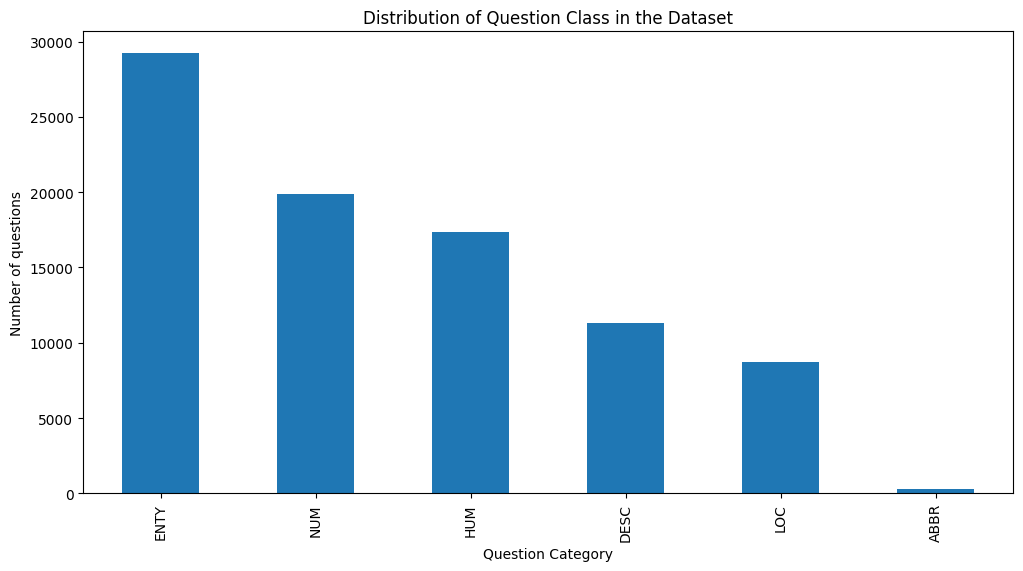

Count for categories:  question_class
ENTY    29220
NUM     19873
HUM     17327
DESC    11323
LOC      8729
ABBR      309
Name: count, dtype: int64
Percentage for categories:  question_class
ENTY    0.336710
NUM     0.229002
HUM     0.199664
DESC    0.130478
LOC     0.100587
ABBR    0.003561
Name: count, dtype: float64


In [5]:
# Question category distribution

# Count the number of questions per category
qc_counts = df_squad['question_class'].value_counts()

# Plot the distribution
plt.figure(figsize=(12,6))
qc_counts.plot(kind='bar')
plt.title('Distribution of Question Class in the Dataset')
plt.xlabel('Question Category')
plt.ylabel('Number of questions')
plt.show()

print("Count for categories: ", qc_counts)

# Calculate the proportion of each topic
qc_proportions = qc_counts / qc_counts.sum()

print("Percentage for categories: ", qc_proportions)

 Understand the length distribution of contexts and questions, which can impact retrieval and processing efficiency. This analysis helps in understanding whether certain lengths correlate with specific topics or retrieval difficulties.

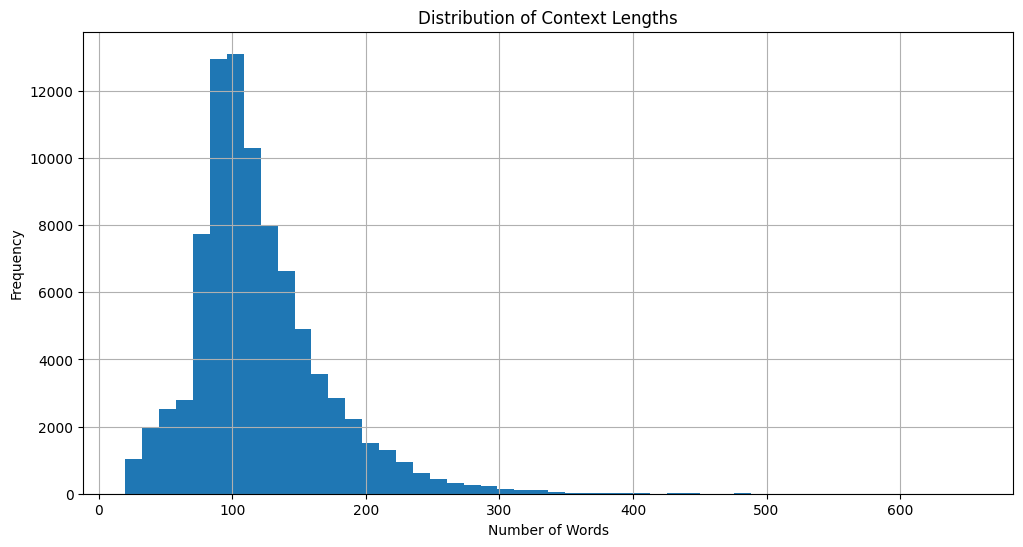

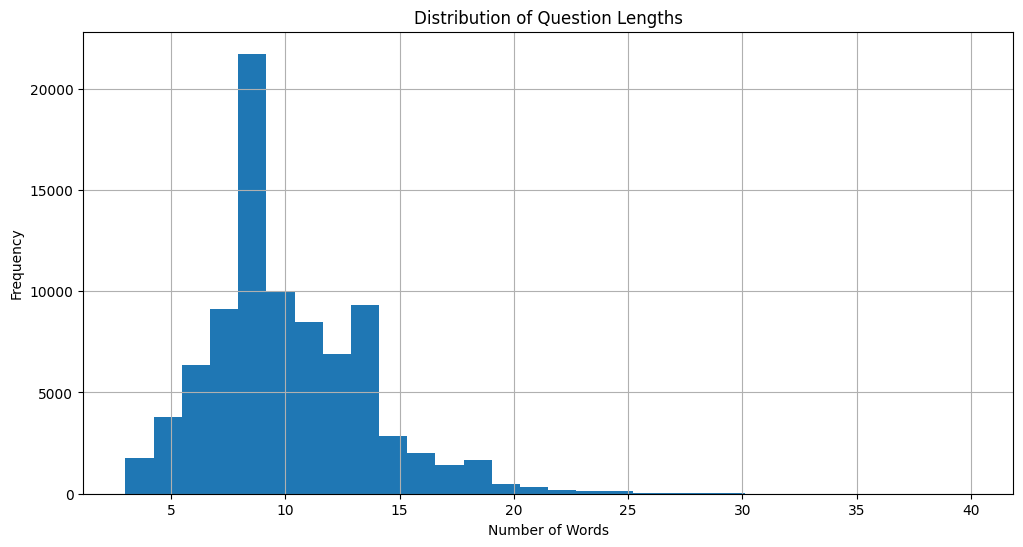

In [6]:
# Context length
df_squad['context_length'] = df_squad['context'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
df_squad['context_length'].hist(bins=50)
plt.title('Distribution of Context Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Question length
df_squad['question_length'] = df_squad['question'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
df_squad['question_length'].hist(bins=30)
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Identify the most common words and their frequencies in contexts and questions. This can reveal dominant terms that might influence topic modeling and retrieval.

Categorize questions based on their starting word (e.g., Who, What, When) to see if certain types are more prevalent. Understanding question types can help tailor query transformations to handle specific query structures.

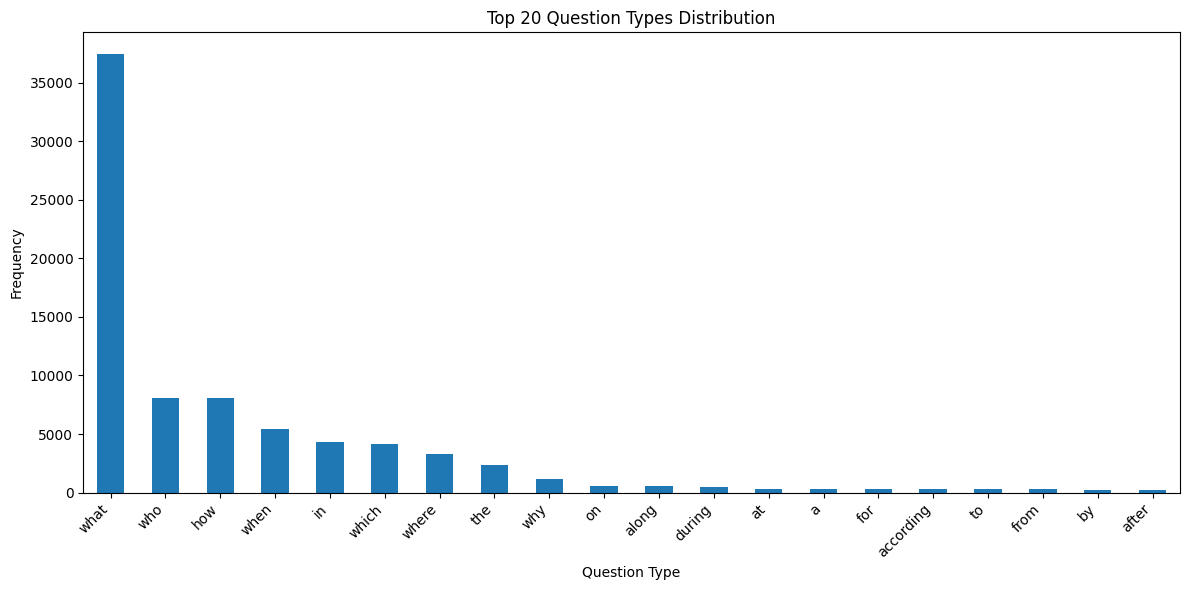

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def get_question_type(question):
    match = re.match(r'^\W*(\w+)', question)
    return match.group(1).lower() if match else 'unknown'

# Extract question types as before
df_squad['question_type'] = df_squad['question'].apply(get_question_type)

# Count question types
question_type_counts = df_squad['question_type'].value_counts()

# Limit to top 20 most frequent question types
top_question_types = question_type_counts.head(20)

# Plot the distribution
plt.figure(figsize=(12,6))
top_question_types.plot(kind='bar')

# Adjust x-axis labels
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Top 20 Question Types Distribution')
plt.xlabel('Question Type')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

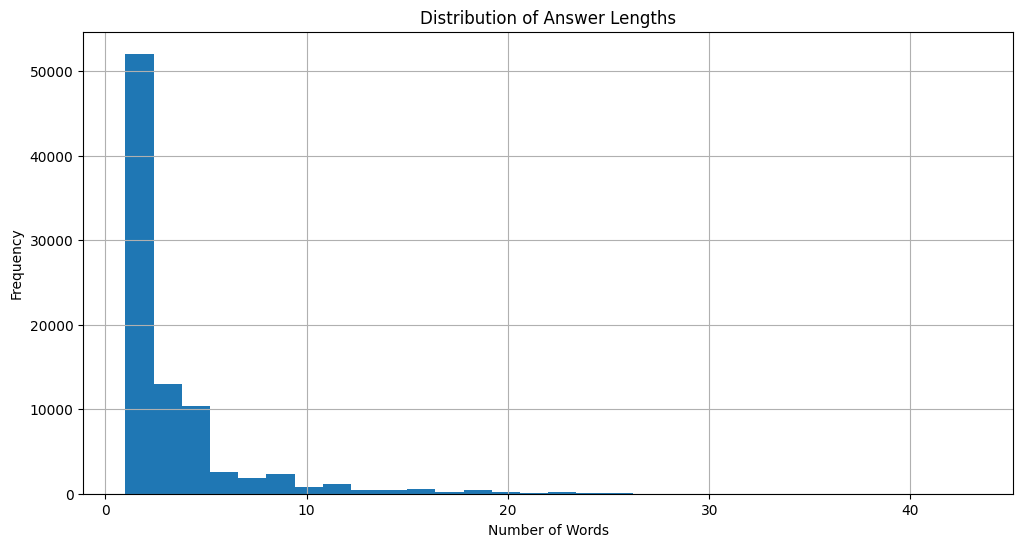

In [8]:
# Answer length
df_squad['answer_length'] = df_squad['answers'].apply(lambda x: len(x[0].split()) if x else 0)
plt.figure(figsize=(12,6))
df_squad['answer_length'].hist(bins=30)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

Analyze the lengths of the ground truth answers and their positions within the contexts. This can inform the retrieval component about typical answer sizes and help in optimizing the retrieval window.

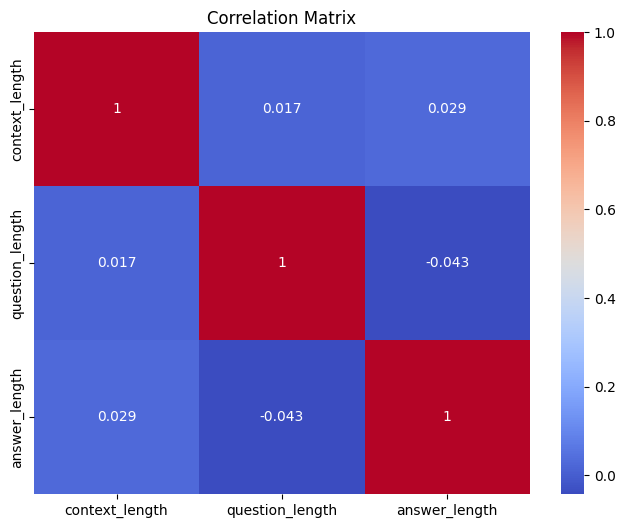

In [9]:
# Create a DataFrame with relevant columns
correlation_df = df_squad[['context_length', 'question_length', 'answer_length']]

# Compute the correlation matrix
corr = correlation_df.corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation between question-, context- and answer-length.

## PubmedQA Dataset

### Load data

In [10]:
df_pubmedqa = pd.read_csv("../data/cleaned/pubmedqa/pubmedqa_cleaned_topics.csv")

In [11]:
df_pubmedqa.head()

,question,context,answer,meshes,question_length,context_length,topic_hdp,category_hdp,topic_lda,category_lda
0,Are group 2 innate lymphoid cells ( ILC2s ) in...,Chronic rhinosinusitis (CRS) is a heterogeneou...,"As ILC2s are elevated in patients with CRSwNP,...","['Adult' 'Aged' 'Antigens, Surface' 'Case-Cont...",18,266,42.0,1.0,1,2
1,Does vagus nerve contribute to the development...,Phosphatidylethanolamine N-methyltransferase (...,Neuronal signals via the hepatic vagus nerve c...,"['Animals' 'Chemokine CCL2' 'Diet, High-Fat' '...",16,216,97.0,5.0,1,2
2,Does psammaplin A induce Sirtuin 1-dependent a...,Psammaplin A (PsA) is a natural product isolat...,PsA significantly inhibited MCF-7/adr cells pr...,"['Acetylation' 'Animals' 'Antibiotics, Antineo...",18,82,1.0,3.0,1,2
3,Is methylation of the FGFR2 gene associated wi...,This study examined links between DNA methylat...,We identified a novel biologically plausible c...,[],14,113,NaN,NaN,1,2
4,Do tumor-infiltrating immune cell profiles and...,Tumor microenvironment immunity is associated ...,Breast cancer immune cell subpopulation profil...,"['Adult' 'Aged' 'Anthracyclines' 'Antibodies, ...",18,185,11.0,3.0,1,2


In [12]:
df_pubmedqa.shape

(211193, 10)

In [13]:
len(df_pubmedqa['context'].unique())

211143

In [14]:
df_pubmedqa['category_lda'].unique()

array([2, 1], dtype=int64)

### Analysis

This will help to see if any topics are overrepresented or underrepresented, which is crucial for stratified sampling. The education topics below were identified in the pre-processing stage:

**Healthcare Topics**

* Topic #0: ['Tumor Cells, Cultured', 'Enzyme Inhibitors', 'Transfection', 'Promoter Regions, Genetic', 'In Vitro Techniques', 'Alleles', 'Adenocarcinoma', 'Gene Expression Profiling', 'Mice, Transgenic', 'Disease-Free Survival']
* Topic #1: ['Sex Factors', 'Heart Rate', 'Regression Analysis', 'Reference Values', 'Hypertension', 'Longitudinal Studies', 'Hemodynamics', 'Chronic Disease', 'Linear Models', 'C-Reactive Protein']

In [15]:
# Display the shape
print(f"Dataset shape: {df_pubmedqa.shape}")

# Preview the first few rows
print("\nFirst five rows:")
print(df_pubmedqa.head())

# Check data types of each column
print("\nData types:")
print(df_pubmedqa.dtypes)

Dataset shape: (211193, 10)

First five rows:
                                            question  \
0  Are group 2 innate lymphoid cells ( ILC2s ) in...   
1  Does vagus nerve contribute to the development...   
2  Does psammaplin A induce Sirtuin 1-dependent a...   
3  Is methylation of the FGFR2 gene associated wi...   
4  Do tumor-infiltrating immune cell profiles and...   

                                             context  \
0  Chronic rhinosinusitis (CRS) is a heterogeneou...   
1  Phosphatidylethanolamine N-methyltransferase (...   
2  Psammaplin A (PsA) is a natural product isolat...   
3  This study examined links between DNA methylat...   
4  Tumor microenvironment immunity is associated ...   

                                              answer  \
0  As ILC2s are elevated in patients with CRSwNP,...   
1  Neuronal signals via the hepatic vagus nerve c...   
2  PsA significantly inhibited MCF-7/adr cells pr...   
3  We identified a novel biologically plausible c...   


In [16]:
# Check for missing values
missing_values = df_pubmedqa.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
question               0
context                0
answer                 0
meshes                 0
question_length        0
context_length         0
topic_hdp          11210
category_hdp       11210
topic_lda              0
category_lda           0
dtype: int64


C:\Users\Emir\AppData\Local\Temp\ipykernel_1660\2467685626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


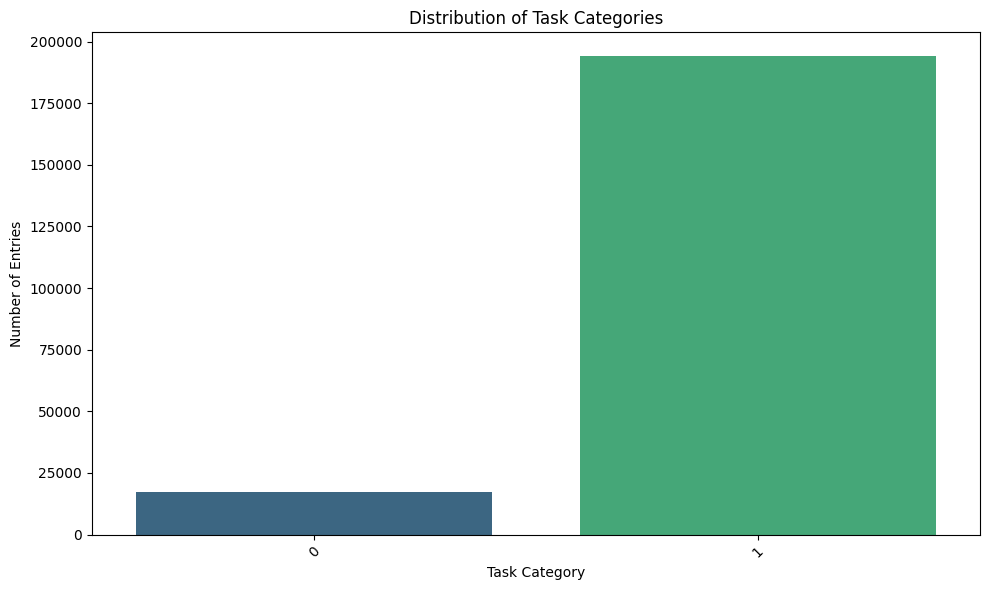

In [17]:
# Get the count of each category
category_counts = df_pubmedqa['topic_lda'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Task Categories')
plt.xlabel('Task Category')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
print(category_counts)

topic_lda
1    194079
0     17114
Name: count, dtype: int64



Context Length Statistics:
count    211193.000000
mean        200.502948
std          50.664793
min           1.000000
25%         170.000000
50%         200.000000
75%         226.000000
max         983.000000
Name: context_length, dtype: float64


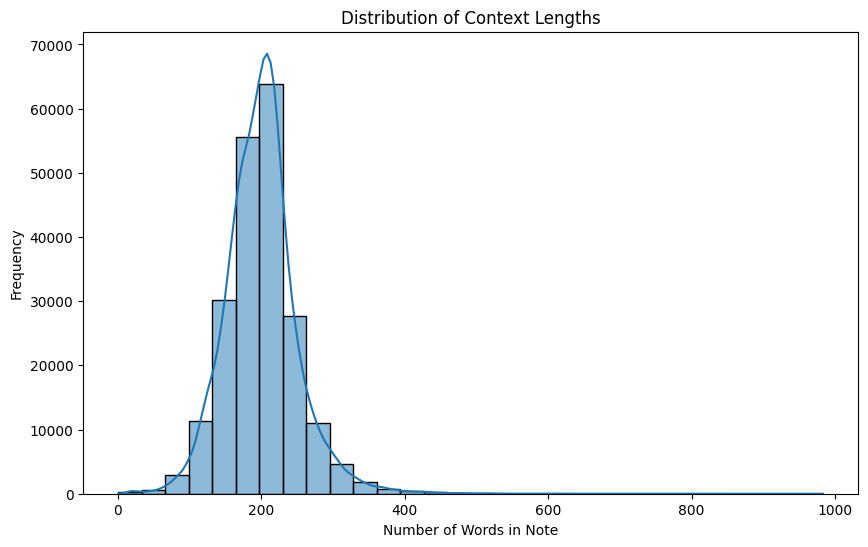

In [19]:
# Calculate note lengths in terms of word counts
df_pubmedqa['context_length'] = df_pubmedqa['context'].apply(lambda x: len(x.split()))

# Descriptive statistics
print("\nContext Length Statistics:")
print(df_pubmedqa['context_length'].describe())

# Histogram of note lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_pubmedqa['context_length'], bins=30, kde=True)
plt.title('Distribution of Context Lengths')
plt.xlabel('Number of Words in Note')
plt.ylabel('Frequency')
plt.show()


Question Length Statistics:
count    211193.000000
mean         15.344093
std           3.898216
min           3.000000
25%          13.000000
50%          15.000000
75%          17.000000
max         109.000000
Name: question_length, dtype: float64


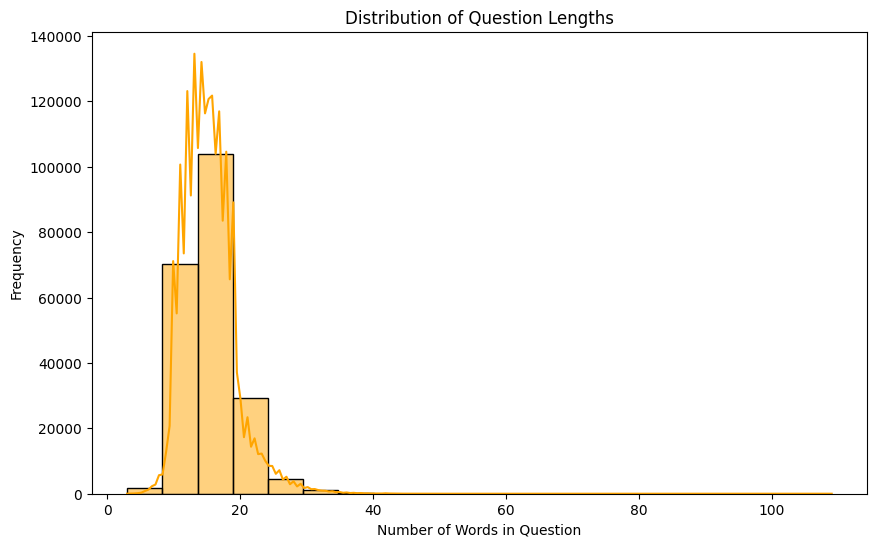

In [26]:
# Calculate question lengths
df_pubmedqa['question_length'] = df_pubmedqa['question'].apply(lambda x: len(x.split()))

# Descriptive statistics
print("\nQuestion Length Statistics:")
print(df_pubmedqa['question_length'].describe())

# Histogram of question lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_pubmedqa['question_length'], bins=20, kde=True, color='orange')
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Words in Question')
plt.ylabel('Frequency')
plt.show()


Answer Length Statistics:
count    211193.000000
mean         37.592889
std          18.496362
min           1.000000
25%          25.000000
50%          34.000000
75%          46.000000
max         510.000000
Name: answer_length, dtype: float64


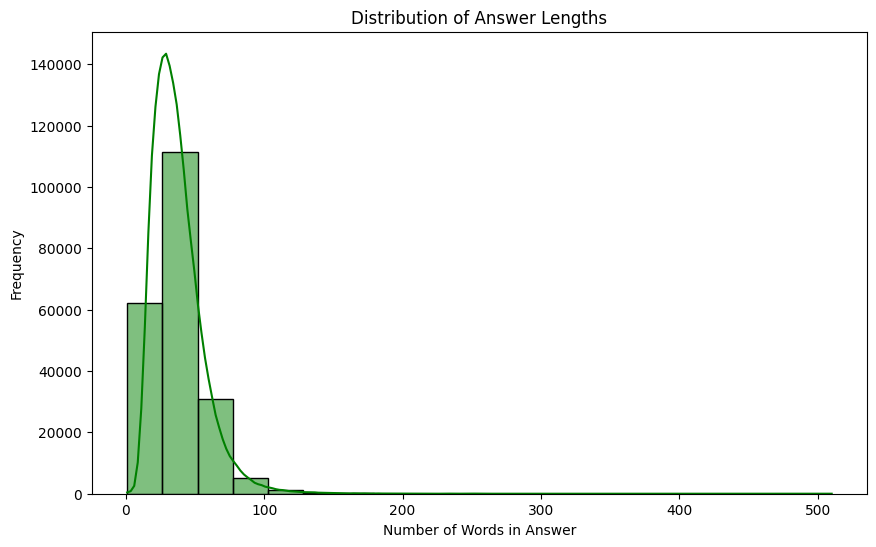

In [27]:
# Calculate answer lengths
df_pubmedqa['answer_length'] = df_pubmedqa['answer'].apply(lambda x: len(x.split()))

# Descriptive statistics
print("\nAnswer Length Statistics:")
print(df_pubmedqa['answer_length'].describe())

# Histogram of answer lengths
plt.figure(figsize=(10, 6))
sns.histplot(df_pubmedqa['answer_length'], bins=20, kde=True, color='green')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Number of Words in Answer')
plt.ylabel('Frequency')
plt.show()

C:\Users\Emir\AppData\Local\Temp\ipykernel_1660\2280010838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=first_word_counts.index, y=first_word_counts.values, palette='magma')


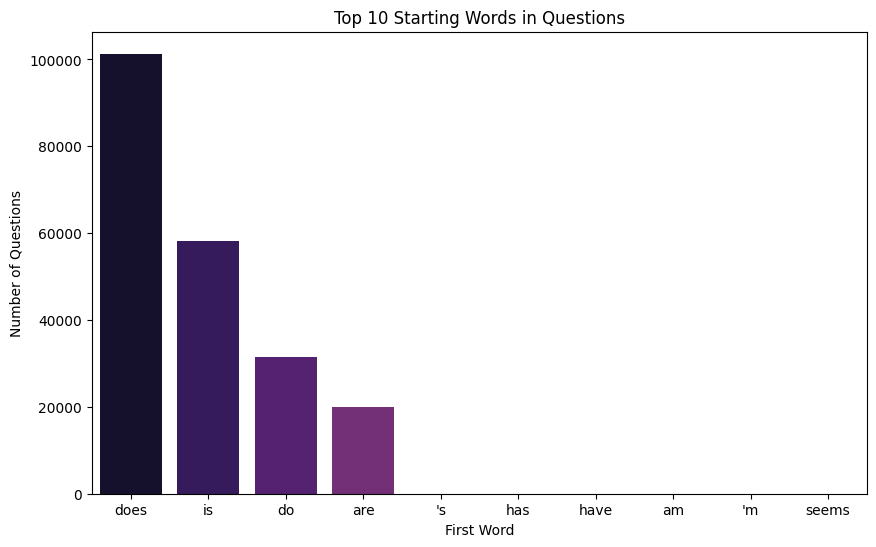

In [28]:
# Extract the first word of each question
df_pubmedqa['question_first_word'] = df_pubmedqa['question'].apply(lambda x: x.strip().split()[0].lower())

# Get the count of each first word
first_word_counts = df_pubmedqa['question_first_word'].value_counts().head(10)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=first_word_counts.index, y=first_word_counts.values, palette='magma')
plt.title('Top 10 Starting Words in Questions')
plt.xlabel('First Word')
plt.ylabel('Number of Questions')
plt.show()

C:\Users\Emir\AppData\Local\Temp\ipykernel_1660\992119555.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=common_words_df, palette='coolwarm')


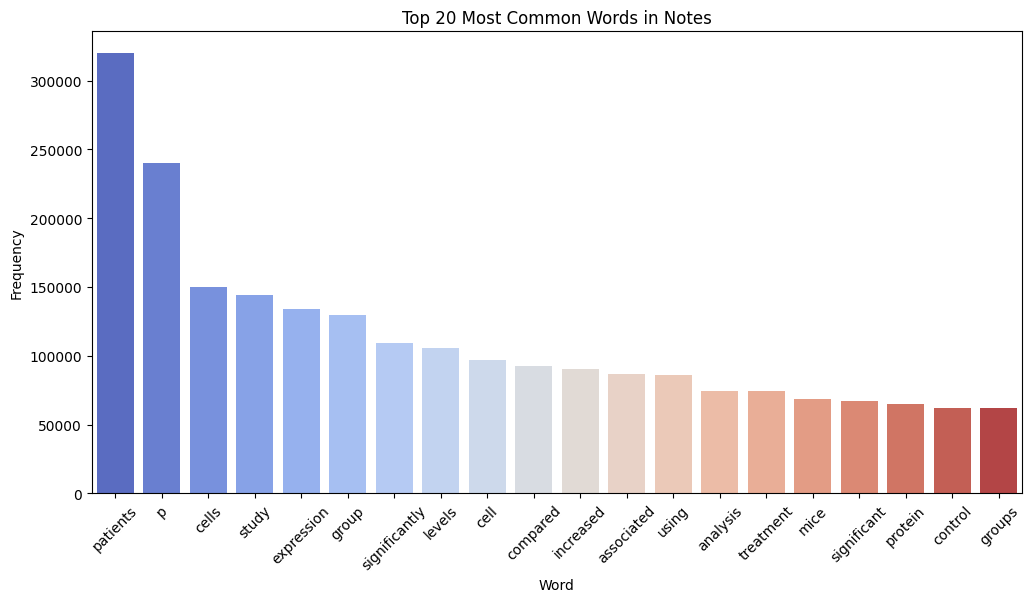

In [29]:
stop_words = set(stopwords.words('english'))

# Combine all notes into one large string
all_notes = ' '.join(df_pubmedqa['context'])

# Tokenize the text
tokens = nltk.word_tokenize(all_notes.lower())

# Remove stopwords and punctuation
tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Get the most common words
word_freq = Counter(tokens)
common_words = word_freq.most_common(20)

# Create a DataFrame for visualization
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Bar plot of the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=common_words_df, palette='coolwarm')
plt.title('Top 20 Most Common Words in Notes')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

C:\Users\Emir\AppData\Local\Temp\ipykernel_1660\3603576120.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='topic_lda', y='answer_length', data=answer_length_by_category, palette='Set2')


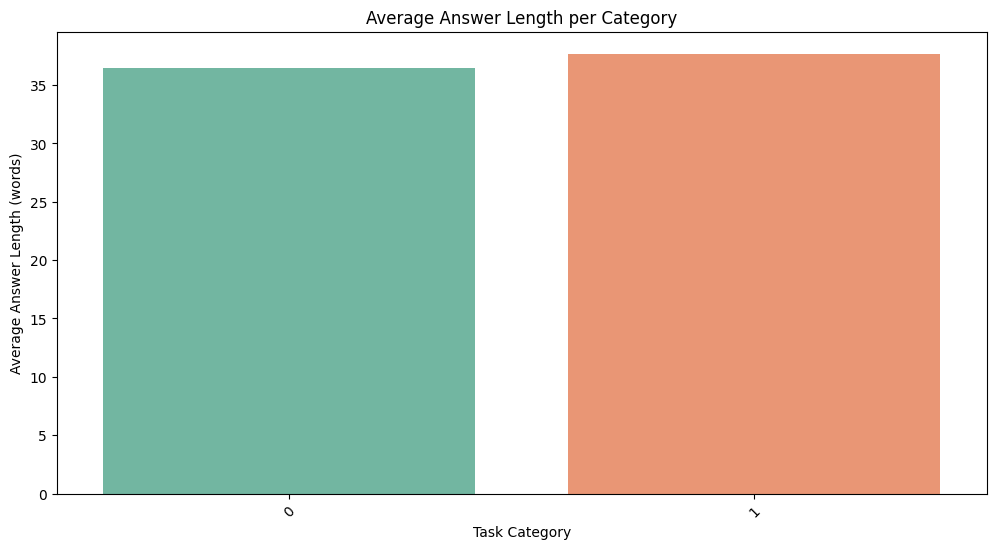

In [30]:
# Calculate average answer length per category
answer_length_by_category = df_pubmedqa.groupby('topic_lda')['answer_length'].mean().reset_index()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='topic_lda', y='answer_length', data=answer_length_by_category, palette='Set2')
plt.title('Average Answer Length per Category')
plt.xlabel('Task Category')
plt.ylabel('Average Answer Length (words)')
plt.xticks(rotation=45)
plt.show()

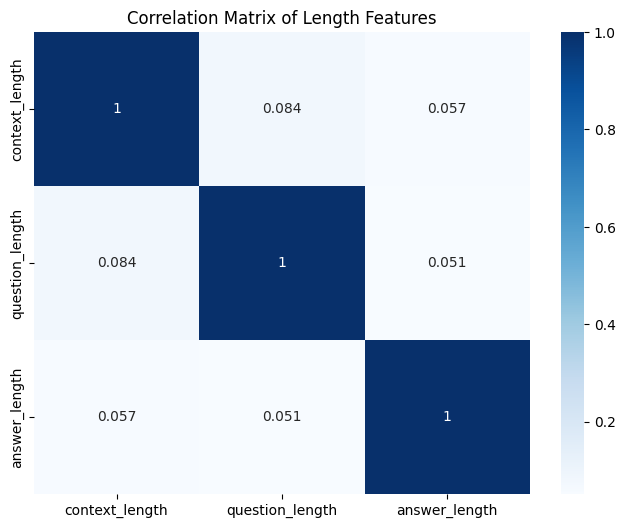

In [31]:
# Select numerical features
numerical_features = ['context_length', 'question_length', 'answer_length']

# Compute correlation matrix
corr_matrix = df_pubmedqa[numerical_features].corr()

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Length Features')
plt.show()

### Subsetting the dataset

Subsetting the healthcare dataset to match and mimic the number of the SQuAD dataset to increase comparability.

In [32]:
# Define desired sample size
desired_sample_size = 20000

# Calculate topic proportions
topic_counts = df_pubmedqa['topic_lda'].value_counts()
total_topics = topic_counts.sum()
topic_proportions = topic_counts / total_topics

# Calculate samples per topic
samples_per_topic = (topic_proportions * desired_sample_size).round().astype(int)
total_samples = samples_per_topic.sum()
print(f"Total Samples Calculated: {total_samples}")

# Adjust for rounding differences
difference = desired_sample_size - total_samples

if difference > 0:
    fractional_parts = (topic_proportions * desired_sample_size) - samples_per_topic
    for _ in range(difference):
        topic_to_increment = fractional_parts.idxmax()
        samples_per_topic[topic_to_increment] += 1
        fractional_parts[topic_to_increment] = 0
elif difference < 0:
    fractional_parts = (topic_proportions * desired_sample_size) - samples_per_topic
    for _ in range(-difference):
        topic_to_decrement = fractional_parts.idxmin()
        samples_per_topic[topic_to_decrement] -= 1
        fractional_parts[topic_to_decrement] = 0

# Recalculate total samples after adjustment
total_samples = samples_per_topic.sum()
print(f"Total Samples After Adjustment: {total_samples}")

Total Samples Calculated: 20000
Total Samples After Adjustment: 20000


In [33]:
# Perform stratified sampling
sampled_df = pd.DataFrame(columns=df_pubmedqa.columns)

for topic, sample_count in samples_per_topic.items():
    topic_df = df_pubmedqa[df_pubmedqa['topic_lda'] == topic]
    
    if len(topic_df) < sample_count:
        print(f"Warning: Not enough samples in topic '{topic}'. Requested: {sample_count}, Available: {len(topic_df)}. Taking all available samples.")
        sampled_topic_df = topic_df
    else:
        sampled_topic_df = topic_df.sample(n=sample_count, random_state=42)
    
    sampled_df = pd.concat([sampled_df, sampled_topic_df], ignore_index=True)

# Shuffle the sampled DataFrame
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Final shape
print(f"Final Sampled DataFrame Shape: {sampled_df.shape}")

# Verify sampling distribution
print("\nOriginal 'topic_lda' Distribution:")
print(df_pubmedqa['topic_lda'].value_counts(normalize=True))

print("\nSampled 'topic_lda' Distribution:")
print(sampled_df['topic_lda'].value_counts(normalize=True))

C:\Users\Emir\AppData\Local\Temp\ipykernel_1660\4135383851.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sampled_df = pd.concat([sampled_df, sampled_topic_df], ignore_index=True)


Final Sampled DataFrame Shape: (20000, 12)

Original 'topic_lda' Distribution:
topic_lda
1    0.918965
0    0.081035
Name: proportion, dtype: float64

Sampled 'topic_lda' Distribution:
topic_lda
1    0.91895
0    0.08105
Name: proportion, dtype: float64


In [34]:
sampled_df.head()

,question,context,answer,meshes,question_length,context_length,topic_hdp,category_hdp,topic_lda,category_lda,answer_length,question_first_word
0,Is clinical examination insufficient to rule o...,The role of clinical examination in the diagno...,Clinical examination as a stand-alone screenin...,"['Adolescent' 'Adult' 'Aged' 'Aged, 80 and ove...",10,277,134.0,1.0,1,2,96,is
1,Is mucosal IgG4 cell infiltration in ulcerativ...,The distribution of IgG4 plasma cells in colon...,IgG4 plasma cells are significantly increased ...,['Adolescent' 'Adult' 'Case-Control Studies' '...,16,246,104.0,4.0,1,2,23,is
2,Does p-selectin glycoprotein-ligand-1 regulate...,Neutrophil-mediated lung injury is an insidiou...,These data demonstrate that PSGL-1 plays a key...,['Abdomen' 'Animals' 'Blood Platelets' 'Chemok...,15,178,49.0,1.0,1,2,61,does
3,Are [ Higher nitric oxide levels associated wi...,Oxidative stress generated within inflammatory...,There are increased levels of nitric oxide in ...,"['Adult' 'Arthritis, Rheumatoid' 'Biomarkers' ...",16,217,4.0,3.0,1,2,28,are
4,Is the human G147D-protein phosphatase 1 inhib...,A human protein phosphatase inhibitor-1 polymo...,The present findings indicate that the human i...,['Adolescent' 'Adult' 'African Continental Anc...,16,137,11.0,3.0,1,2,28,is


In [24]:
# Save the sampled subset
sampled_df.to_csv('../data/cleaned/pubmedqa/pubmedqa_cleaned_topics_subset.csv', index=False, encoding='utf-8')

## Comparison SQuAD PubMedQA

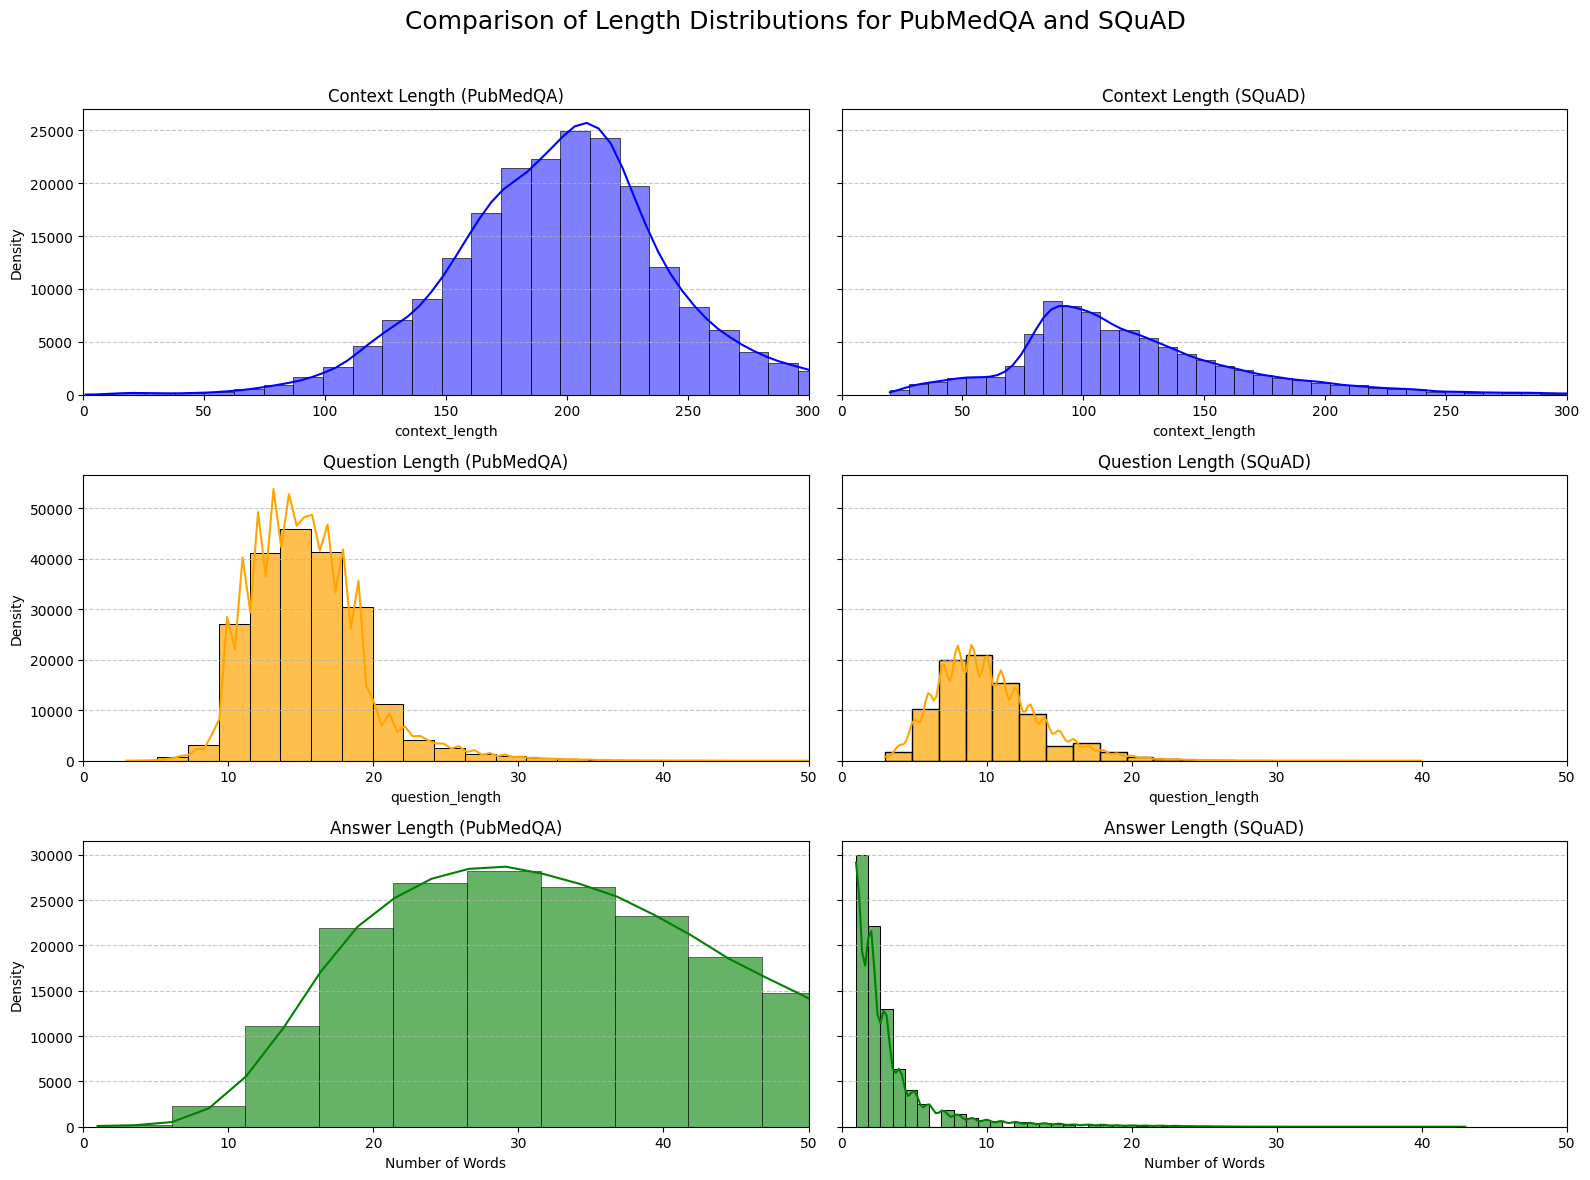

In [35]:
# Define x-axis limits for clarity
context_limit = 300
question_limit = 50
answer_limit = 50

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12), sharex=False, sharey='row')
fig.suptitle('Comparison of Length Distributions for PubMedQA and SQuAD', fontsize=18)

# Plot context lengths
sns.histplot(
    df_pubmedqa['context_length'], bins=80, kde=True, color='blue', ax=axes[0, 0], alpha=0.5
).set(title='Context Length (PubMedQA)', xlim=(0, context_limit))
sns.histplot(
    df_squad['context_length'], bins=80, kde=True, color='blue', ax=axes[0, 1], alpha=0.5
).set(title='Context Length (SQuAD)', xlim=(0, context_limit))

# Plot question lengths
sns.histplot(
    df_pubmedqa['question_length'], bins=50, kde=True, color='orange', ax=axes[1, 0], alpha=0.7
).set(title='Question Length (PubMedQA)', xlim=(0, question_limit))
sns.histplot(
    df_squad['question_length'], bins=20, kde=True, color='orange', ax=axes[1, 1], alpha=0.7
).set(title='Question Length (SQuAD)', xlim=(0, question_limit))

# Plot answer lengths
sns.histplot(
    df_pubmedqa['answer_length'], bins=100, kde=True, color='green', ax=axes[2, 0], alpha=0.6
).set(title='Answer Length (PubMedQA)', xlim=(0, answer_limit))
sns.histplot(
    df_squad['answer_length'], bins=50, kde=True, color='green', ax=axes[2, 1], alpha=0.6
).set(title='Answer Length (SQuAD)', xlim=(0, answer_limit))

# Add shared labels
for ax in axes[:, 0]:
    ax.set_ylabel('Density')

for ax in axes[-1, :]:
    ax.set_xlabel('Number of Words')

# Add grid lines for clarity
for ax_row in axes:
    for ax in ax_row:
        ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

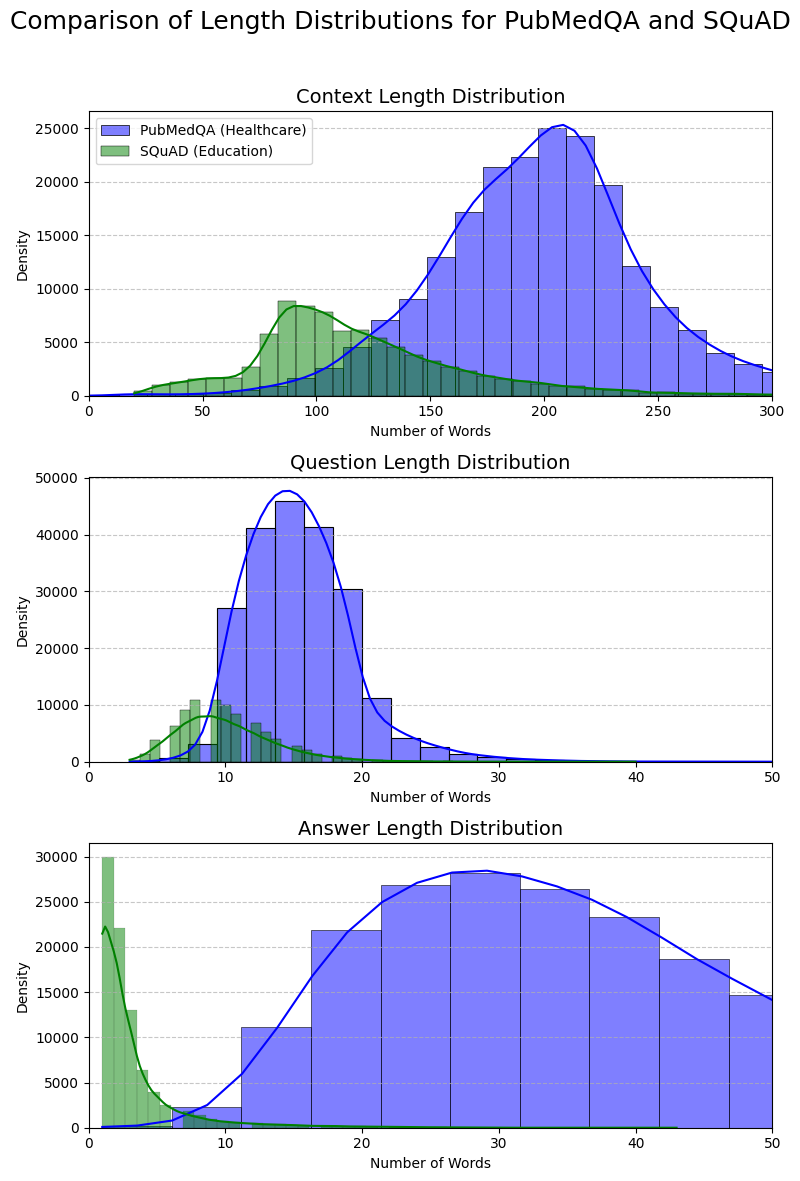

In [36]:
# Define x-axis limits for conciseness
context_limit = 300 
question_limit = 50 
answer_limit = 50

# Create a single figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=False, sharey=False)
fig.suptitle('Comparison of Length Distributions for PubMedQA and SQuAD', fontsize=18)

# Plot context lengths
sns.histplot(
    df_pubmedqa['context_length'], bins=80, kde=True, color='blue', label='PubMedQA (Healthcare)', ax=axes[0], alpha=0.5, kde_kws={'bw_adjust': 1.5}
)
sns.histplot(
    df_squad['context_length'], bins=80, kde=True, color='green', label='SQuAD (Education)', ax=axes[0], alpha=0.5
)
axes[0].set_title('Context Length Distribution', fontsize=14)
axes[0].set_xlim(0, context_limit)
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Density')
axes[0].legend()

# Plot question lengths
sns.histplot(
    df_pubmedqa['question_length'], bins=50, kde=True, color='blue', label='PubMedQA (Healthcare)', ax=axes[1], alpha=0.5, kde_kws={'bw_adjust': 3.0}
)
sns.histplot(
    df_squad['question_length'], bins=50, kde=True, color='green', label='SQuAD (Education)', ax=axes[1], alpha=0.5, kde_kws={'bw_adjust': 1.5}
)
axes[1].set_title('Question Length Distribution', fontsize=14)
axes[1].set_xlim(0, question_limit)
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Density')

# Plot answer lengths
sns.histplot(
    df_pubmedqa['answer_length'], bins=100, kde=True, color='blue', label='PubMedQA (Healthcare)', ax=axes[2], alpha=0.5, kde_kws={'bw_adjust': 1.5}
)
sns.histplot(
    df_squad['answer_length'], bins=50, kde=True, color='green', label='SQuAD (Education)', ax=axes[2], alpha=0.5, kde_kws={'bw_adjust': 1.5}
)
axes[2].set_title('Answer Length Distribution', fontsize=14)
axes[2].set_xlim(0, answer_limit)
axes[2].set_xlabel('Number of Words')
axes[2].set_ylabel('Density')

# Add grid lines for clarity
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.96])

#plt.savefig('figures/method_both_comparison.png')
#plt.savefig('figures/method_both_comparison.svg', format='svg', dpi=1200)

plt.show()